<a href="https://colab.research.google.com/github/Feymankamal/Chromaticity-1931/blob/main/colour_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we plot the CIE 1913 chromaticity diagram with **colour module**

In [2]:
!pip list | grep colour

colour                             0.1.5


Sometimes the environment variable is not set properly so if it gives errors like  **colour is not a module** please *restart the session* and run this cell of code

In [3]:
%env COLOUR_SCIENCE__COLOUR__IMPORT_VAAB_COLOUR=true
!pip install -q colour-science

!python -c "import imageio;imageio.plugins.freeimage.download()"

!mkdir -p /content/downloads

# Uncomment the following lines for the latest develop  branch content.
!pip uninstall -y colour-science
!if ! [ -d "colour" ]; then git clone https://github.com/colour-science/colour; fi
!if [ -d "colour" ]; then cd colour && git fetch && git checkout develop && git pull && cd ..; fi

import sys
sys.path.insert(0, 'colour')

env: COLOUR_SCIENCE__COLOUR__IMPORT_VAAB_COLOUR=true
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 19.4 MB/s eta 0:00:00
Imageio: 'libfreeimage-3.16.0-linux64.so' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/freeimage/libfreeimage-3.16.0-linux64.so (4.6 MB)
Downloading: 8192/4830080 bytes (0.2%)4830080/4830080 bytes (100.0%)
  Done
File saved as /root/.imageio/freeimage/libfreeimage-3.16.0-linux64.so.
Found existing installation: colour-science 0.4.6
Uninstalling colour-science-0.4.6:
  Successfully uninstalled colour-science-0.4.6
Cloning into 'colour'...
remote: Enumerating objects: 70706, done.
remote: Counting objects: 100% (6630/6630), done.
remote: Compressing objects: 100% (2295/2295), done.
remote: Total 70706 (delta 5041), reused 5593 (delta 4299), pack-reused 64076 (from 1)
Receivin

The code below is check wheather the environment variable is set properly.

In [4]:
import colour

colour.utilities.describe_environment();

*                                                                             *
*   Interpreter :                                                             *
*       python : 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]           *
*                                                                             *
*   colour-science.org :                                                      *
*       colour : v0.4.6-25-g88df92105                                         *
*                                                                             *
*   Runtime :                                                                 *
*       imageio : 2.36.0                                                      *
*       matplotlib : 3.8.0                                                    *
*       networkx : 3.4.2                                                      *
*       numpy : 1.26.4                                                        *
*       pandas : 2.2.2                  

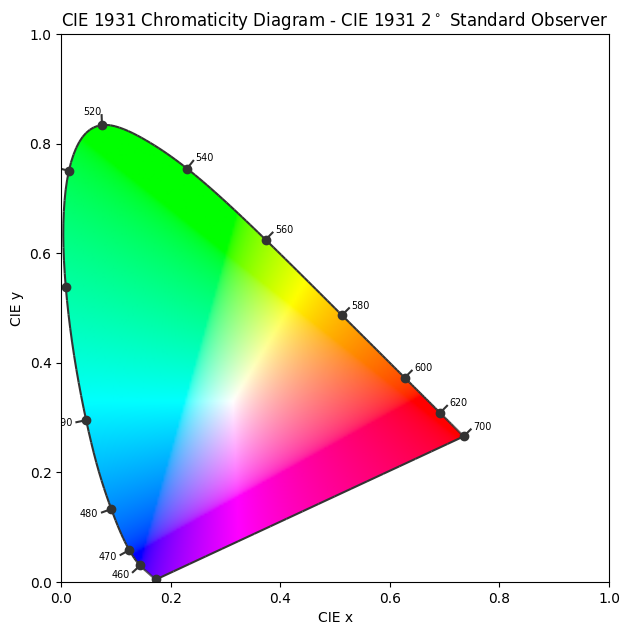

(<Figure size 640x640 with 1 Axes>,
 <Axes: title={'center': 'CIE 1931 Chromaticity Diagram - CIE 1931 2$^\\circ$ Standard Observer'}, xlabel='CIE x', ylabel='CIE y'>)

In [ ]:
from colour.plotting import plot_chromaticity_diagram_CIE1931
plot_chromaticity_diagram_CIE1931()

For plotting points in the chromaticity diagram

Now we want to calculate the X,Y and Z values by the following formulae

$X(\lambda)=\int_{400} ^{700} R(\lambda)x(\lambda) d\lambda$

$Y(\lambda)=\int_{400} ^{700} R(\lambda)y(\lambda) d\lambda$

$Z(\lambda)=\int_{400} ^{700} R(\lambda)z(\lambda) d\lambda$

from this the points **x,y** are calculated as follows

$x=\frac{X}{X+Y+Z}$

$y=\frac{Y}{X+Y+Z}$


In [12]:
from scipy import interpolate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Now we will read the necessary data files

* cie colour matching function
* experimental data

In [ ]:
%cd /content/sample_data/

/content/sample_data


In [ ]:
cie=pd.read_excel('CIE_xyz_1931_2deg.xlsx')

In [ ]:
cie

,wave_length,x,y,z
0,360,0.000130,3.917000e-06,0.000606
1,361,0.000146,4.393581e-06,0.000681
2,362,0.000164,4.929604e-06,0.000765
3,363,0.000184,5.532136e-06,0.000860
4,364,0.000207,6.208245e-06,0.000967
...,...,...,...,...
466,826,0.000002,5.980895e-07,0.000000
467,827,0.000002,5.575746e-07,0.000000
468,828,0.000001,5.198080e-07,0.000000
469,829,0.000001,4.846123e-07,0.000000


We **plot** the data to verify it

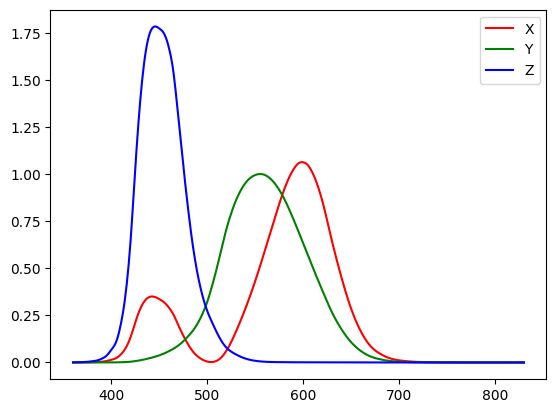

In [ ]:
plt.plot(cie.wave_length,cie.x,'r-',label='X')
plt.plot(cie.wave_length,cie.y,'g-',label='Y')
plt.plot(cie.wave_length,cie.z,'b-',label='Z')
plt.legend(loc='upper right')

Now we interpolate experimental data in a selected range of wavelength $\lambda=400nm-700nm$ for the 700nm pattern

# interpolation
now we will interpolate experimental data

In [ ]:
wvl=np.arange(400,701,1)

In [ ]:
wvl

Now we do the integration using **trapezoidal rule** to find **X**, **Y**, **Z**

In [ ]:
x_ch=np.trapz(y_700*cie.x[40:341],wvl)
print(x_ch)

In [ ]:
y_ch=np.trapz(y_700*cie.y[40:341],wvl)
print(y_ch)

In [ ]:
z_ch=np.trapz(y_700*cie.z[40:341],wvl)
print(z_ch)

In [ ]:
x=x_ch/(x_ch+y_ch+z_ch)
y=y_ch/(x_ch+y_ch+z_ch)
print(x,y)

In [ ]:
print(cie.x[40:341])

In [ ]:
x_300,y_300=xyval(y_300)
print(x_300,y_300)

# periodicity variation for particular angle
 Here we will see how periodicity affects the colour for a particular angle of incidence

In [ ]:
from scipy import interpolate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Now load the **CIE1931 chromaticity colour functions**

In [ ]:
%cd /content/sample_data

/content/sample_data


In [ ]:
%pwd

In [ ]:
cie=pd.read_excel('CIE_xyz_1931_2deg.xlsx')

Now we will load the data for the following periodicities
* 800nm
* 700nm
* 600nm
* 500nm
for different angle of incidence $\theta= 40^o, 50^o, 60^o$

In [ ]:
ref_40=pd.read_excel('periodicity_40deg.xlsx', skiprows=2)

In [ ]:
ref_40

,Wavelength,ptrn_800nm,ptrn_700nm,ptrn_600nm,ptrn_500nm
0,177.034042,52.876012,253.484363,333.482659,409.458118
1,177.635483,72.227853,243.340757,307.017635,348.903727
2,178.236897,90.618067,233.592082,281.736728,293.898669
3,178.838283,108.046654,224.238336,257.639939,244.442944
4,179.439643,124.513614,215.279519,234.727268,200.536552
...,...,...,...,...,...
1607,1098.293049,62.715985,116.753936,32.497251,67.127021
1608,1098.831547,67.083203,122.050737,30.294343,76.756374
1609,1099.369994,71.623419,127.371256,27.970370,87.304244
1610,1099.908389,76.336633,132.715491,25.525331,98.770631


In [ ]:
ref_50=pd.read_excel('periodicity_50deg.xlsx', skiprows=2)

In [ ]:
ref_50

NameError: name 'ref_50' is not defined

In [ ]:
ref_60=pd.read_excel('periodicity_60deg.xlsx', skiprows=2)

In [ ]:
ref_60

,Wavelength,ptrn_800nm,ptrn_700nm,ptrn_600nm,ptrn_500nm
0,177.034042,280.646966,282.212680,111.179021,156.72093
1,177.635483,261.130588,260.874909,121.071909,157.11431
2,178.236897,242.409236,240.734687,130.456092,157.46922
3,178.838283,224.482909,221.792014,139.331568,157.78566
4,179.439643,207.351608,204.046890,147.698340,158.06364
...,...,...,...,...,...
1607,1098.293049,99.077252,146.989122,88.767972,37.00717
1608,1098.831547,110.516583,176.855870,90.884729,35.91427
1609,1099.369994,122.822289,209.018338,93.039764,34.78904
1610,1099.908389,135.994372,243.476526,95.233078,33.63148


Here is our function for calculating x, y values

In [ ]:
def xyval(y):
  xch=np.trapz(y*cie.x[40:341],wvl)
  ych=np.trapz(y*cie.y[40:341],wvl)
  zch=np.trapz(y*cie.z[40:341],wvl)
  x=xch/(xch+ych+zch)
  y=ych/(xch+ych+zch)
  return x,y

common wavelength for integration

In [ ]:
wvl=np.arange(400,701,1)

## For 40 degrees
  now calculate the x,y values for 40 degrees for different periodicity

In [ ]:
f40_800=interpolate.interp1d(ref_40.Wavelength, ref_40.ptrn_800nm)
# obtain y value from interpolated function
y40_800=f40_800(wvl)
# for 700nm periodicity
f40_700=interpolate.interp1d(ref_40.Wavelength, ref_40.ptrn_700nm)
y40_700=f40_700(wvl)
# for 600nm periodicity
f40_600=interpolate.interp1d(ref_40.Wavelength, ref_40.ptrn_600nm)
y40_600=f40_600(wvl)
# for 500nm periodicity
f40_500=interpolate.interp1d(ref_40.Wavelength, ref_40.ptrn_500nm)
y40_500=f40_500(wvl)

x, y values for

**800nm**

NameError: name 'cie' is not defined

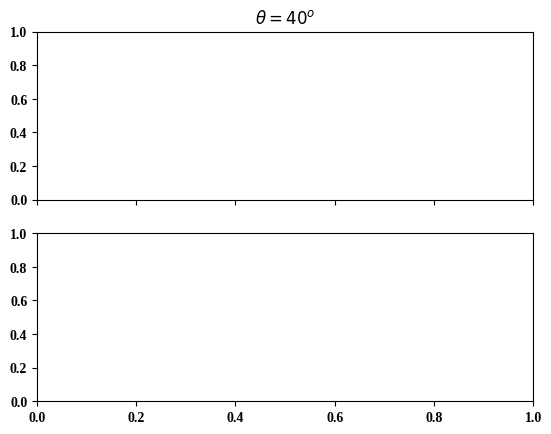

In [ ]:
#now make two plots to understand
fig,ax=plt.subplots(2,1, sharex=True)
ax[0].set_title(r'$\theta=40^o$')
ax[0].plot(cie.wave_length,cie.x,'g-', label='x')
ax[0].plot(cie.wave_length,cie.y,'r-',label='y')
ax[0].plot(cie.wave_length,cie.z,'b-',label='z')
ax[0].legend(loc='best')
#plot 800nm data
ax[1].plot(wvl,y40_800,'r-',label='p=800nm')
ax[1].legend(loc='best')
ax[1].text(740,5000,'x={0:01f},\ny={1:01f}'.format(xch40_800,ych40_800))
#plt.savefig('plots/40deg_800.png')
plt.show()

In [ ]:
xch40_800,ych40_800=xyval(y40_800)
print(xch40_800,ych40_800)

0.6056541235115753 0.2923070083914322


**700nm**

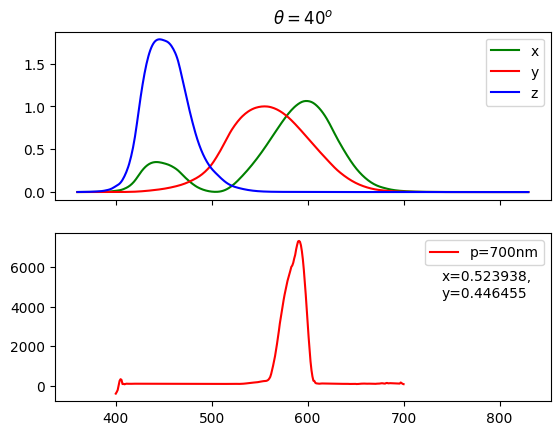

In [ ]:
#now make two plots to understand
fig,ax=plt.subplots(2,1, sharex=True)
ax[0].set_title(r'$\theta=40^o$')
ax[0].plot(cie.wave_length,cie.x,'g-', label='x')
ax[0].plot(cie.wave_length,cie.y,'r-',label='y')
ax[0].plot(cie.wave_length,cie.z,'b-',label='z')
ax[0].legend(loc='best')
#plot 800nm data
ax[1].plot(wvl,y40_700,'r-',label='p=700nm')
ax[1].legend(loc='best')
ax[1].text(740,4500,'x={0:01f},\ny={1:01f}'.format(xch40_700,ych40_700))
#plt.savefig('plots/40deg_800.png')
plt.show()

In [ ]:
xch40_700,ych40_700=xyval(y40_700)
print(xch40_700,ych40_700)

0.52393849132332 0.44645506346376945


**600nm**

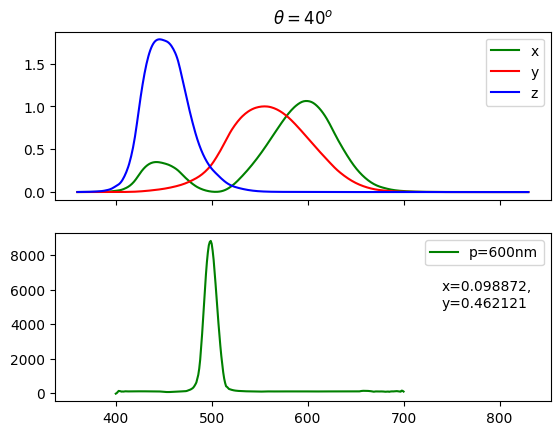

In [ ]:
#now make two plots to understand
fig,ax=plt.subplots(2,1, sharex=True)
ax[0].set_title(r'$\theta=40^o$')
ax[0].plot(cie.wave_length,cie.x,'g-', label='x')
ax[0].plot(cie.wave_length,cie.y,'r-',label='y')
ax[0].plot(cie.wave_length,cie.z,'b-',label='z')
ax[0].legend(loc='best')
#plot 800nm data
ax[1].plot(wvl,y40_600,'g-',label='p=600nm')
ax[1].legend(loc='best')
ax[1].text(740,5000,'x={0:01f},\ny={1:01f}'.format(xch40_600,ych40_600))
#plt.savefig('plots/40deg_800.png')
plt.show()

In [ ]:
xch40_600,ych40_600=xyval(y40_600)
print(xch40_600,ych40_600)

0.0988722735965 0.462121301106


**500nm**

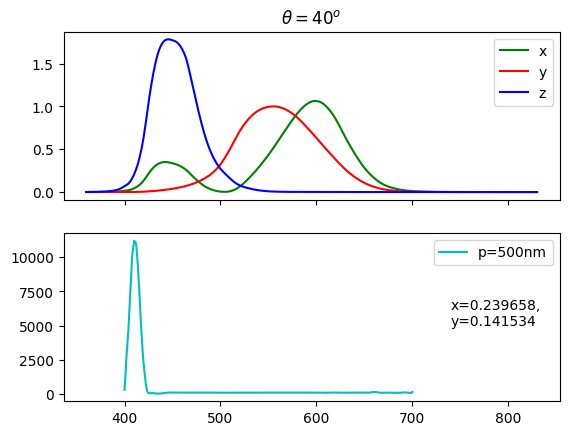

In [ ]:
#now make two plots to understand
fig,ax=plt.subplots(2,1, sharex=True)
ax[0].set_title(r'$\theta=40^o$')
ax[0].plot(cie.wave_length,cie.x,'g-', label='x')
ax[0].plot(cie.wave_length,cie.y,'r-',label='y')
ax[0].plot(cie.wave_length,cie.z,'b-',label='z')
ax[0].legend(loc='best')
#plot 800nm data
ax[1].plot(wvl,y40_500,'c-',label='p=500nm')
ax[1].legend(loc='best')
ax[1].text(740,5000,'x={0:01f},\ny={1:01f}'.format(xch40_500,ych40_500))
#plt.savefig('plots/40deg_800.png')
plt.show()

In [ ]:
xch40_500,ych40_500=xyval(y40_500)
print(xch40_500,ych40_500)

0.239657854941 0.141534004232


## plot for 40 deg
now plot these values in **chromaticity diagram**

In [ ]:
x40=[xch40_800,xch40_700,xch40_600,xch40_500]
y40=[ych40_800,ych40_700,ych40_600,ych40_500]
print('x values=',x40)
print('y values=',y40)

x values= [0.60565412351157533, 0.52393849132332004, 0.098872273596496182, 0.23965785494131217]
y values= [0.2923070083914322, 0.44645506346376945, 0.46212130110564553, 0.14153400423177026]


/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028
/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028


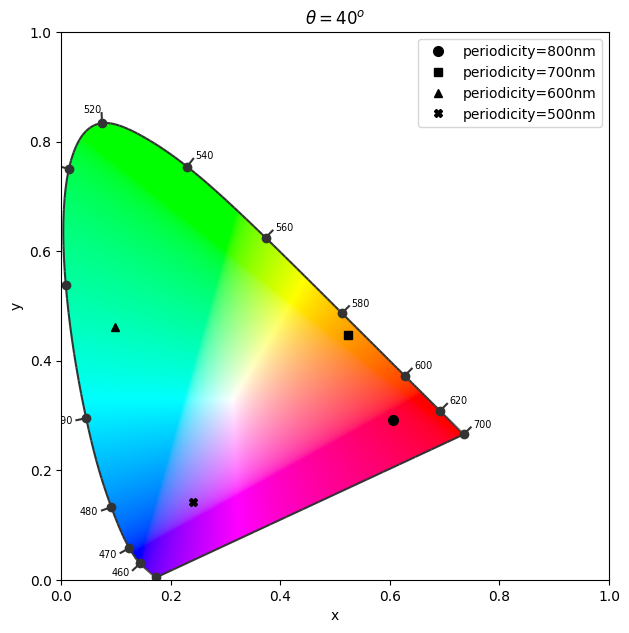

In [ ]:
import colour
figure, axes = colour.plotting.diagrams.plot_chromaticity_diagram_CIE1931(standalone=False)
axes.plot(xch40_800,ych40_800, 'ko', ms=7, label='periodicity=800nm')
axes.plot(xch40_700, ych40_700, 'ks', label='periodicity=700nm')
axes.plot(xch40_600, ych40_600, 'k^', label='periodicity=600nm')
axes.plot(xch40_500, ych40_500, 'kX', label='periodicity=500nm')
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'$\theta=40^o$')
plt.legend(loc='upper right')
#plt.savefig('figures/40deg.pdf')

## For 50 deg
  repeat the same thing for 50 deg

In [ ]:
f50_800=interpolate.interp1d(ref_50.Wavelength, ref_50.ptrn_800nm)
# obtain y value from interpolated function
y50_800=f50_800(wvl)
# for 700nm periodicity
f50_700=interpolate.interp1d(ref_50.Wavelength, ref_50.ptrn_700nm)
y50_700=f50_700(wvl)
# for 600nm periodicity
f50_600=interpolate.interp1d(ref_50.Wavelength, ref_50.ptrn_600nm)
y50_600=f50_600(wvl)
# for 500nm periodicity
f50_500=interpolate.interp1d(ref_50.Wavelength, ref_50.ptrn_500nm)
y50_500=f50_500(wvl)

x, y values for

**800nm**

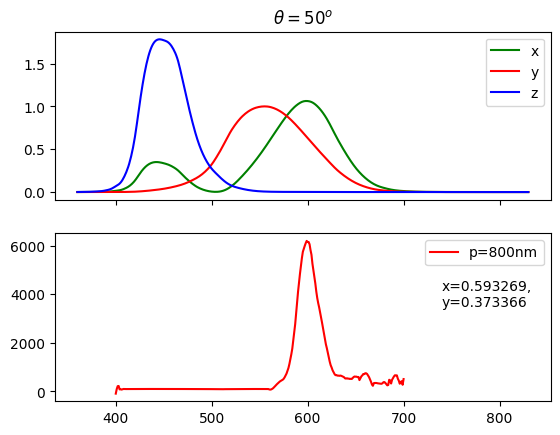

In [ ]:
#now make two plots to understand
fig,ax=plt.subplots(2,1, sharex=True)
ax[0].set_title(r'$\theta=50^o$')
ax[0].plot(cie.wave_length,cie.x,'g-', label='x')
ax[0].plot(cie.wave_length,cie.y,'r-',label='y')
ax[0].plot(cie.wave_length,cie.z,'b-',label='z')
ax[0].legend(loc='best')
#plot 800nm data
ax[1].plot(wvl,y50_800,'r-',label='p=800nm')
ax[1].legend(loc='best')
ax[1].text(740,3500,'x={0:01f},\ny={1:01f}'.format(xch50_800,ych50_800))
#plt.savefig('plots/40deg_800.png')
plt.show()

In [ ]:
xch50_800,ych50_800=xyval(y50_800)
print(xch50_800,ych50_800)

0.5932686363747857 0.3733657236318525


**700nm**

In [ ]:
xch50_700,ych50_700=xyval(y50_700)
print(xch50_700,ych50_700)

0.19996722815437365 0.624508758168642


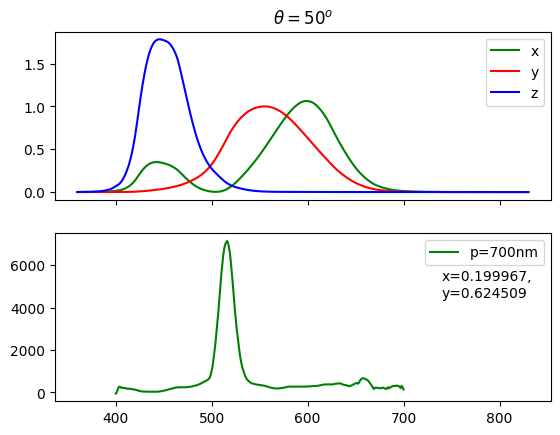

In [ ]:
#now make two plots to understand
fig,ax=plt.subplots(2,1, sharex=True)
ax[0].set_title(r'$\theta=50^o$')
ax[0].plot(cie.wave_length,cie.x,'g-', label='x')
ax[0].plot(cie.wave_length,cie.y,'r-',label='y')
ax[0].plot(cie.wave_length,cie.z,'b-',label='z')
ax[0].legend(loc='best')
#plot 800nm data
ax[1].plot(wvl,y50_700,'g-',label='p=700nm')
ax[1].legend(loc='best')
ax[1].text(740,4500,'x={0:01f},\ny={1:01f}'.format(xch50_700,ych50_700))
#plt.savefig('plots/40deg_800.png')
plt.show()

**600nm**

In [ ]:
xch50_600,ych50_600=xyval(y50_600)
print(xch50_600,ych50_600)

0.1575435331796264 0.21446076830121122


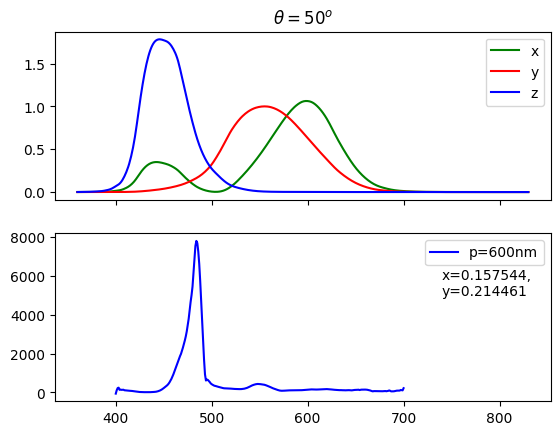

In [ ]:
#now make two plots to understand
fig,ax=plt.subplots(2,1, sharex=True)
ax[0].set_title(r'$\theta=50^o$')
ax[0].plot(cie.wave_length,cie.x,'g-', label='x')
ax[0].plot(cie.wave_length,cie.y,'r-',label='y')
ax[0].plot(cie.wave_length,cie.z,'b-',label='z')
ax[0].legend(loc='best')
#plot 800nm data
ax[1].plot(wvl,y50_600,'b-',label='p=600nm')
ax[1].legend(loc='best')
ax[1].text(740,5000,'x={0:01f},\ny={1:01f}'.format(xch50_600,ych50_600))
#plt.savefig('plots/40deg_800.png')
plt.show()

**500nm**

In [ ]:
xch50_500,ych50_500=xyval(y50_500)
print(xch50_500,ych50_500)

0.2675847356339426 0.2600754706100267


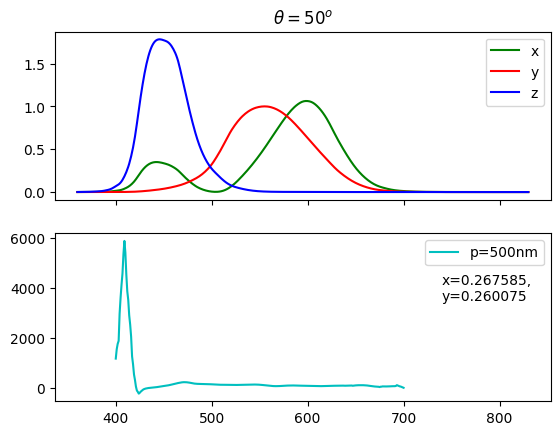

In [ ]:
#now make two plots to understand
fig,ax=plt.subplots(2,1, sharex=True)
ax[0].set_title(r'$\theta=50^o$')
ax[0].plot(cie.wave_length,cie.x,'g-', label='x')
ax[0].plot(cie.wave_length,cie.y,'r-',label='y')
ax[0].plot(cie.wave_length,cie.z,'b-',label='z')
ax[0].legend(loc='best')
#plot 800nm data
ax[1].plot(wvl,y50_500,'c-',label='p=500nm')
ax[1].legend(loc='best')
ax[1].text(740,3500,'x={0:01f},\ny={1:01f}'.format(xch50_500,ych50_500))
#plt.savefig('plots/40deg_800.png')
plt.show()

## plot for 50 deg
now plot these values in **chromaticity diagram**

In [ ]:
x50=[xch50_800,xch50_700,xch50_600,xch50_500]
y50=[ych50_800,ych50_700,ych50_600,ych50_500]
print('x values=',x50)
print('y values=',y50)

x values= [0.59326863637478566, 0.19996722815437365, 0.15754353317962641, 0.26758473563394258]
y values= [0.3733657236318525, 0.62450875816864204, 0.21446076830121122, 0.26007547061002673]


/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028
/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028


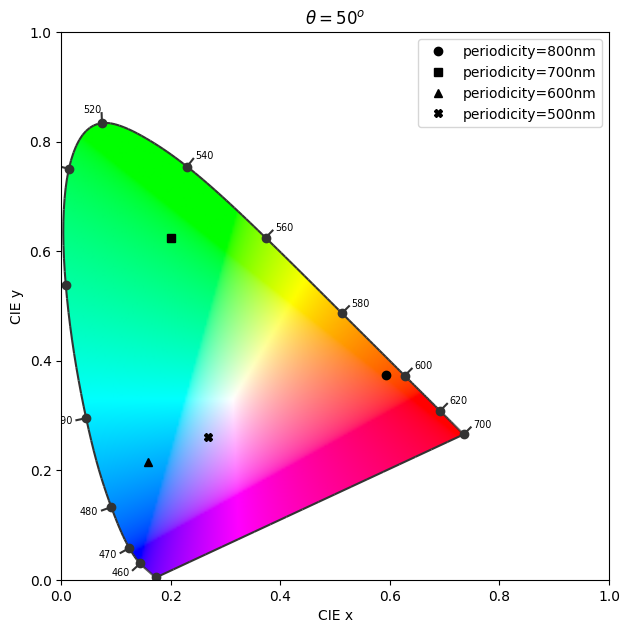

In [ ]:
import colour
figure, axes = colour.plotting.diagrams.plot_chromaticity_diagram_CIE1931(standalone=False)
axes.plot(xch50_800,ych50_800, 'ko', label='periodicity=800nm')
axes.plot(xch50_700, ych50_700, 'ks', label='periodicity=700nm')
axes.plot(xch50_600, ych50_600, 'k^', label='periodicity=600nm')
axes.plot(xch50_500, ych50_500, 'kX', label='periodicity=500nm')
plt.title(r'$\theta=50^o$')
plt.legend(loc='upper right')
plt.savefig('figures/50deg.pdf')

## For 60 deg
Interpolate for different patterns

In [ ]:
f60_800=interpolate.interp1d(ref_60.Wavelength, ref_60.ptrn_800nm)
# obtain y value from interpolated function
y60_800=f60_800(wvl)
# for 700nm periodicity
f60_700=interpolate.interp1d(ref_60.Wavelength, ref_60.ptrn_700nm)
y60_700=f60_700(wvl)
# for 600nm periodicity
f60_600=interpolate.interp1d(ref_60.Wavelength, ref_60.ptrn_600nm)
y60_600=f60_600(wvl)
# for 500nm periodicity
f60_500=interpolate.interp1d(ref_60.Wavelength, ref_60.ptrn_500nm)
y60_500=f60_500(wvl)

Now calculate the **x,y** values for the patterns

In [ ]:
xch60_800,ych60_800=xyval(y60_800)
print('xch60_800,ych60_800=',xch60_800,ych60_800)
#for 700nm pattern
xch60_700,ych60_700=xyval(y60_700)
print('xch60_700,ych60_700=',xch60_700,ych60_700)
# for 600nm pattern
xch60_600,ych60_600=xyval(y60_600)
print('xch60_600,ych60_600=',xch60_600,ych60_600)
#for 500nm pattern
xch60_500,ych60_500=xyval(y60_500)
print('xch60_500,ych60_500=',xch60_500,ych60_500)

xch60_800,ych60_800= 0.351074823223302 0.3280131794499319
xch60_700,ych60_700= 0.6102552319181989 0.3563546261280697
xch60_600,ych60_600= 0.21747151130575676 0.7071903564917932
xch60_500,ych60_500= 0.27728764637324477 0.2799940268620053


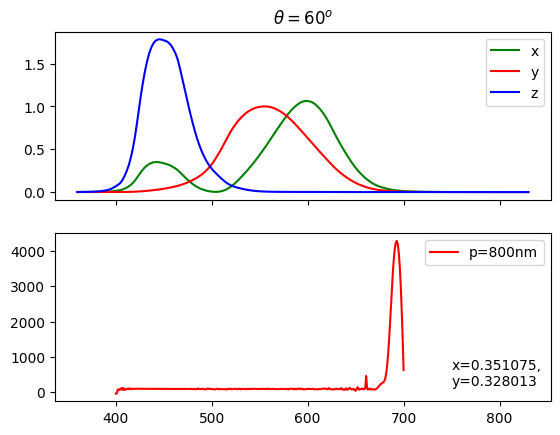

In [ ]:
#now make two plots to understand
fig,ax=plt.subplots(2,1, sharex=True)
ax[0].set_title(r'$\theta=60^o$')
ax[0].plot(cie.wave_length,cie.x,'g-', label='x')
ax[0].plot(cie.wave_length,cie.y,'r-',label='y')
ax[0].plot(cie.wave_length,cie.z,'b-',label='z')
ax[0].legend(loc='best')
#plot 800nm data
ax[1].plot(wvl,y60_800,'r-',label='p=800nm')
#ax[1].plot(wvl,y60_700,'r-',label='p=700nm')
#ax[1].plot(wvl,y60_600,'g-',label='p=600nm')
#ax[1].plot(wvl,y60_500,'b-',label='p=500nm')
ax[1].legend(loc='best')
ax[1].text(750,200,'x={0:01f},\ny={1:01f}'.format(xch60_800,ych60_800))
#plt.savefig('plots/40deg_800.png')
plt.show()

## plot for 60 deg
now plot the points

In [ ]:
import colour
figure, axes = colour.plotting.diagrams.plot_chromaticity_diagram_CIE1931(standalone=False)
axes.plot(xch60_800,ych60_800, 'ko', label='periodicity=800nm')
axes.plot(xch60_700, ych60_700, 'ks', label='periodicity=700nm')
axes.plot(xch60_600, ych60_600, 'k^', label='periodicity=600nm')
axes.plot(xch60_500, ych60_500, 'kX', label='periodicity=500nm')
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'$\theta=60^o$')
plt.legend(loc='upper right')
plt.savefig('figures/60deg.pdf')

AttributeError: module 'colour' has no attribute 'plotting'

# Angle variation for particular periodicity
Now plot how variation of angle of incidence affect the colour for a particular periodicity

## Periodicity 800nm

/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028
/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028


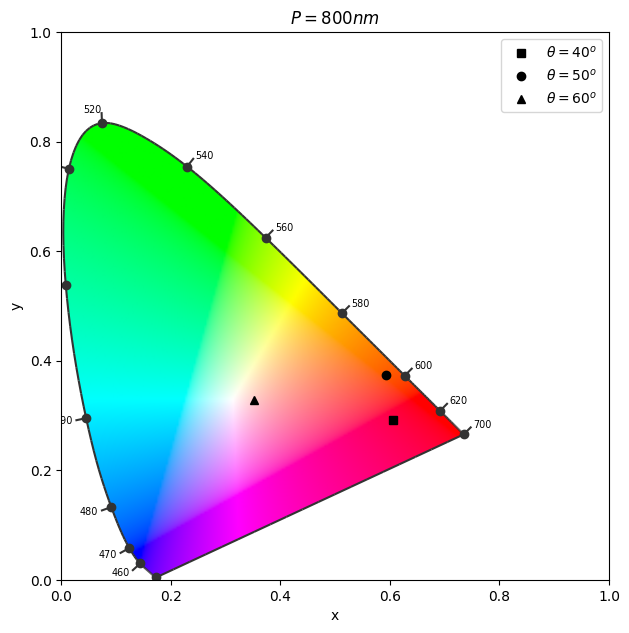

In [ ]:
import colour
figure, axes = colour.plotting.diagrams.plot_chromaticity_diagram_CIE1931(standalone=False)
axes.plot(xch40_800, ych40_800, 'ks', label=r'$\theta=40^o$')
axes.plot(xch50_800, ych50_800, 'ko', label=r'$\theta=50^o$')
axes.plot(xch60_800, ych60_800, 'k^', label=r'$\theta=60^o$')
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'$P=800nm$')
plt.legend(loc='upper right')
plt.savefig('figures/800nm.pdf')

## Periodicity 700nm
for 700nm pattern

/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028
/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028


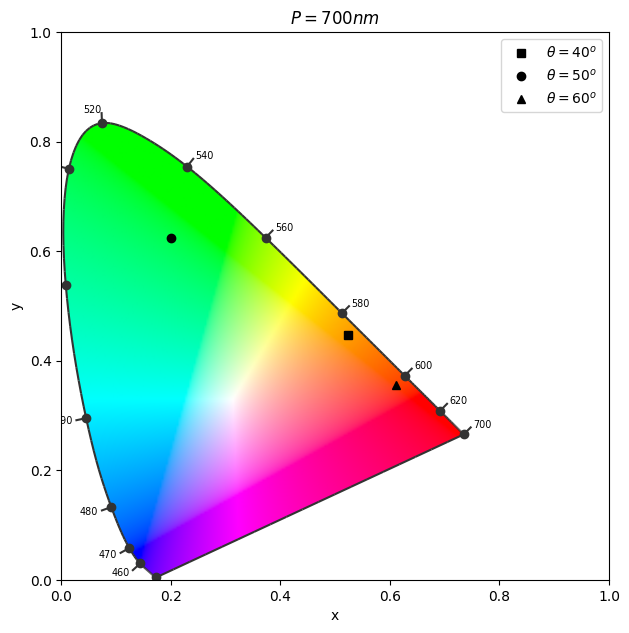

In [ ]:
import colour
figure, axes = colour.plotting.diagrams.plot_chromaticity_diagram_CIE1931(standalone=False)
axes.plot(xch40_700,ych40_700, 'ks', label=r'$\theta=40^o$')
axes.plot(xch50_700, ych50_700, 'ko', label=r'$\theta=50^o$')
axes.plot(xch60_700, ych60_700, 'k^', label=r'$\theta=60^o$')
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'$ P=700nm$')
plt.legend(loc='upper right')
plt.savefig('figures/700nm.pdf')

## Periodicity 600nm
for 600nm periodicity

/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028
/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028


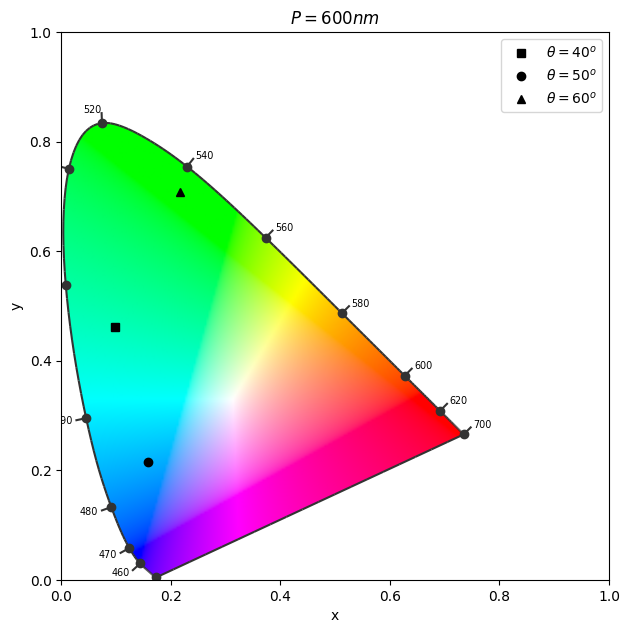

In [ ]:
import colour
figure, axes = colour.plotting.diagrams.plot_chromaticity_diagram_CIE1931(standalone=False)
axes.plot(xch40_600,ych40_600, 'ks', label=r'$\theta=40^o$')
axes.plot(xch50_600, ych50_600, 'ko', label=r'$\theta=50^o$')
axes.plot(xch60_600, ych60_600, 'k^', label=r'$\theta=60^o$')
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'$ P=600nm$')
plt.legend(loc='upper right')
plt.savefig('figures/600nm.pdf')

## Periodicity 500nm
for 500nm periodicity

/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028
/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028


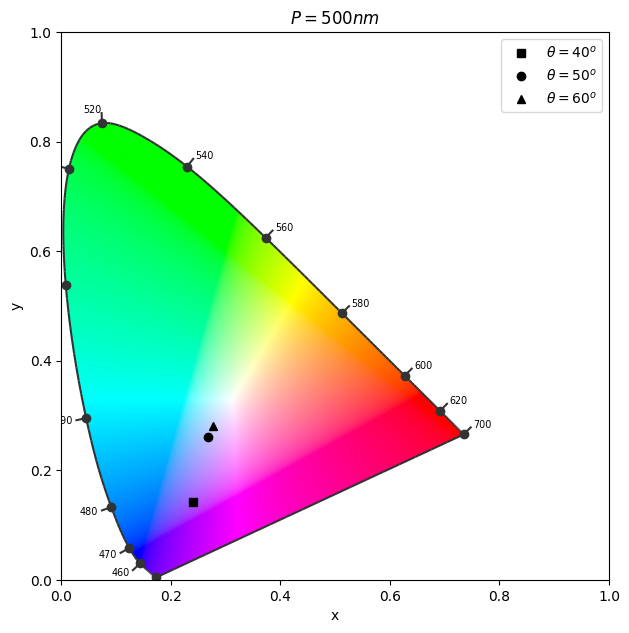

In [ ]:
import colour
figure, axes = colour.plotting.diagrams.plot_chromaticity_diagram_CIE1931(standalone=False)
axes.plot(xch40_500,ych40_500, 'ks', label=r'$\theta=40^o$')
axes.plot(xch50_500, ych50_500, 'ko', label=r'$\theta=50^o$')
axes.plot(xch60_500, ych60_500, 'k^', label=r'$\theta=60^o$')
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'$ P=500nm$')
plt.legend(loc='upper right')
plt.savefig('figures/500nm.pdf')

In [ ]:
print(xch40_500,ych40_500)

0.239657854941 0.141534004232


# Diameter variation
Now plot the diameter variation

In [ ]:
dia=pd.read_excel('diameter_var.xlsx')

In [ ]:
dia

,wavelength,d_280nm,d_267nm,d_253nm,d_240nm
0,380.11744,-27.45887,-689.07349,115.01631,11.82628
1,380.20748,-67.54318,-677.82923,24.64518,-53.75528
2,381.24487,-60.04578,-650.00542,-16.82585,134.97453
3,382.07478,-16.78422,-616.61833,-10.84566,134.97453
4,382.85682,-57.72154,-577.10395,-16.93971,122.24109
...,...,...,...,...,...
133,458.61937,90.80290,85.80290,48.54636,80.42964
134,459.20740,90.08231,85.08231,48.20600,82.63432
135,459.79540,87.31933,82.31933,48.00028,85.04116
136,460.38336,84.64847,79.64847,48.03826,87.55905


In [ ]:
cie.x[40:101], cie.wave_length[40:101]

(40     0.014310
 41     0.015704
 42     0.017147
 43     0.018781
 44     0.020748
          ...   
 96     0.314025
 97     0.308884
 98     0.303290
 99     0.297258
 100    0.290800
 Name: x, Length: 61, dtype: float64,
 40     400
 41     401
 42     402
 43     403
 44     404
       ... 
 96     456
 97     457
 98     458
 99     459
 100    460
 Name: wave_length, Length: 61, dtype: int64)

Now iterpolate it from the wavelength $\lambda=400-460nm$


In [ ]:
wavel=np.arange(400,461,1)
print(wavel)
wavel.shape

[400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417
 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435
 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450 451 452 453
 454 455 456 457 458 459 460]


(61,)

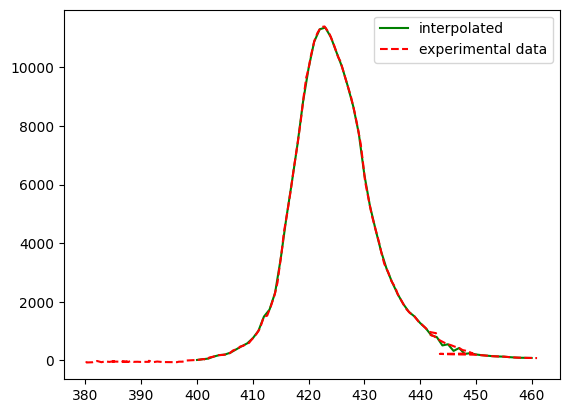

In [ ]:
fd_280=interpolate.interp1d(dia.wavelength, dia.d_280nm)
ydi_280=fd_280(wavel)
plt.plot(wavel,ydi_280,'g-', label="interpolated")
plt.plot(dia.wavelength,dia.d_280nm,'r--',label='experimental data')
#plt.xlim(440,450)
plt.legend(loc='upper right')
plt.show()

Now define a function to do the integration

In [ ]:
def xyvald(y):
  xch=np.trapz(y*cie.x[40:101],wavel)
  ych=np.trapz(y*cie.y[40:101],wavel)
  zch=np.trapz(y*cie.z[40:101],wavel)
  x=xch/(xch+ych+zch)
  y=ych/(xch+ych+zch)
  return x,y

In [ ]:
xd_280,yd_280=xyvald(ydi_280)
print(xd_280,yd_280)

0.168925543206 0.00700605660182


In [ ]:
fd_280=interpolate.interp1d(dia.wavelength, dia.d_280nm)
ydi_280=fd_280(wavel)
fd_267=interpolate.interp1d(dia.wavelength, dia.d_267nm)
ydi_267=fd_267(wavel)
fd_253=interpolate.interp1d(dia.wavelength, dia.d_253nm)
ydi_253=fd_253(wavel)
fd_240=interpolate.interp1d(dia.wavelength, dia.d_240nm)
ydi_240=fd_240(wavel)
#calculate x, y values
xd_280,yd_280=xyvald(ydi_280)
print('xd_280,yd_280=',xd_280,yd_280)
xd_267,yd_267=xyvald(ydi_267)
print('xd_267,yd_267=',xd_267,yd_267)
xd_253,yd_253=xyvald(ydi_253)
print('xd_253,yd_253=',xd_253,yd_253)
xd_240,yd_240=xyvald(ydi_240)
print('xd_240,yd_240=',xd_240,yd_240)

xd_280,yd_280= 0.168925543206 0.00700605660182
xd_267,yd_267= 0.169371057673 0.00670130245426
xd_253,yd_253= 0.170359670265 0.00599674133498
xd_240,yd_240= 0.170698742886 0.00590025291484


/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028
/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028


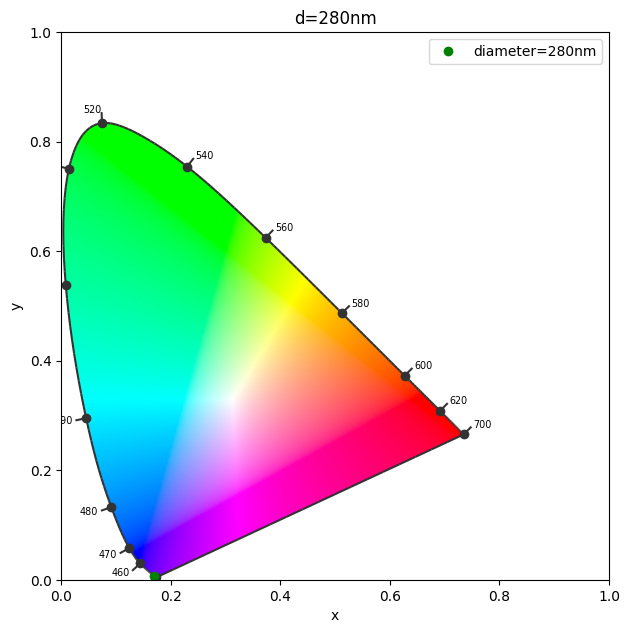

In [ ]:
import colour
figure, axes = colour.plotting.diagrams.plot_chromaticity_diagram_CIE1931(standalone=False)
axes.plot(xd_280, yd_280,'go',label='diameter=280nm')
#axes.plot(xd_267, yd_267, 'ro', label='diameter=267nm')
#axes.plot(xd_253, yd_253, 'bo', label='diameter=253nm')
#axes.plot(xd_240, yd_240, 'co', label='diameter=240nm')
plt.xlabel('x')
plt.ylabel('y')
plt.title('d=280nm')
fd_267=interpolate.interp1d(dia.wavelength, dia.d_267nm)
ydi_267=fd_267(wavel)
plt.legend(loc='upper right')

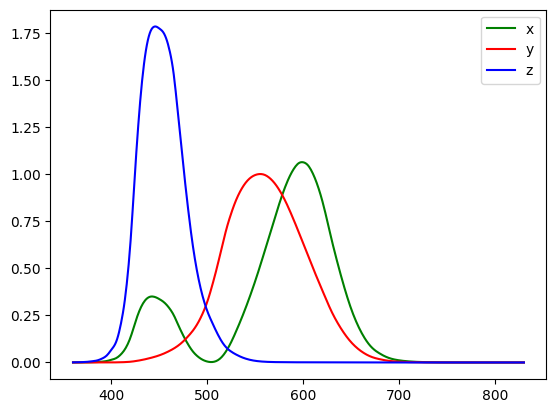

In [ ]:
plt.plot(cie.wave_length,cie.x,'g-',label='x')
plt.plot(cie.wave_length,cie.y,'r',label='y')
plt.plot(cie.wave_length,cie.z,'b',label='z')
plt.legend(loc='upper right')
plt.show()

# new method to skip the hassile
x, y values directly using the library

Now load the data

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import colour
from scipy import interpolate

In [6]:
%cd /content/sample_data

/content/sample_data


In [8]:
ref_40=pd.read_excel('periodicity_40deg.xlsx', skiprows=2)
ref_50=pd.read_excel('periodicity_50deg.xlsx', skiprows=2)
ref_60=pd.read_excel('periodicity_60deg.xlsx', skiprows=2)
cie=pd.read_excel('CIE_xyz_1931_2deg.xlsx')

In [9]:
#now define a new function to calculate x and y values
def xycal(values,wavelengths):
  spectral_distribution = colour.SpectralDistribution(values, wavelengths)
  # Calculate the CIE 1931 XYZ values and then convert to xy coordinates
  XYZ = colour.sd_to_XYZ(spectral_distribution)
  xy = colour.XYZ_to_xy(XYZ)
  x=xy[0]
  y=xy[1]
  return x,y

In [10]:
wvl=np.arange(400,701,1)

## 40 deg incidence
now do it for 40 deg angle of incidence

In [14]:
f40_800=interpolate.interp1d(ref_40.Wavelength, ref_40.ptrn_800nm)
# obtain y value from interpolated function
y40_800=f40_800(wvl)
# for 700nm periodicity
f40_700=interpolate.interp1d(ref_40.Wavelength, ref_40.ptrn_700nm)
y40_700=f40_700(wvl)
# for 600nm periodicity
f40_600=interpolate.interp1d(ref_40.Wavelength, ref_40.ptrn_600nm)
y40_600=f40_600(wvl)
# for 500nm periodicity
f40_500=interpolate.interp1d(ref_40.Wavelength, ref_40.ptrn_500nm)
y40_500=f40_500(wvl)

In [15]:
#now do it for theta=40deg
xc40_800,yc40_800=xycal(y40_800,wvl)
xc40_700,yc40_700=xycal(y40_700,wvl)
xc40_600,yc40_600=xycal(y40_600,wvl)
xc40_500,yc40_500=xycal(y40_500,wvl)

In [16]:
plt.rcParams['font.family'] = 'Liberation Serif'  # Substitute font
plt.rcParams['font.weight'] = 'bold'

/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028
/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028


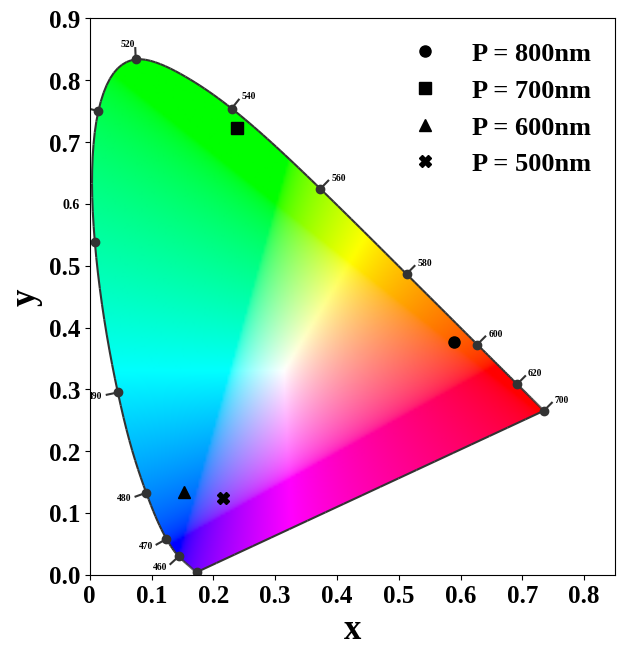

In [17]:
figure, axes = colour.plotting.diagrams.plot_chromaticity_diagram_CIE1931(standalone=False)
axes.plot(xc40_800,yc40_800, 'ko', label='P = 800nm',ms=8)
axes.plot(xc40_700, yc40_700, 'ks', label='P = 700nm',ms=8)
axes.plot(xc40_600, yc40_600, 'k^', label='P = 600nm',ms=8)
axes.plot(xc40_500, yc40_500, 'kX', label='P = 500nm',ms=8)
plt.xlabel('x', fontsize=25, fontweight='bold')
plt.ylabel('y', fontsize=25,fontweight='bold')
plt.xticks(ticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], labels=['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8'], fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0,0.85)
plt.ylim(0,0.9)
plt.title(r'')
plt.legend(loc='upper right',fontsize=19, frameon=False)
#plt.savefig('/content/sample_data/40deg.png', dpi=600)

## 50 deg

In [18]:
f50_800=interpolate.interp1d(ref_50.Wavelength, ref_50.ptrn_800nm)
# obtain y value from interpolated function
y50_800=f50_800(wvl)
# for 700nm periodicity
f50_700=interpolate.interp1d(ref_50.Wavelength, ref_50.ptrn_700nm)
y50_700=f50_700(wvl)
# for 600nm periodicity
f50_600=interpolate.interp1d(ref_50.Wavelength, ref_50.ptrn_600nm)
y50_600=f50_600(wvl)
# for 500nm periodicity
f50_500=interpolate.interp1d(ref_50.Wavelength, ref_50.ptrn_500nm)
y50_500=f50_500(wvl)

In [19]:
#now do it for theta=50deg
xc50_800,yc50_800=xycal(y50_800,wvl)
xc50_700,yc50_700=xycal(y50_700,wvl)
xc50_600,yc50_600=xycal(y50_600,wvl)
xc50_500,yc50_500=xycal(y50_500,wvl)

/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028
/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028


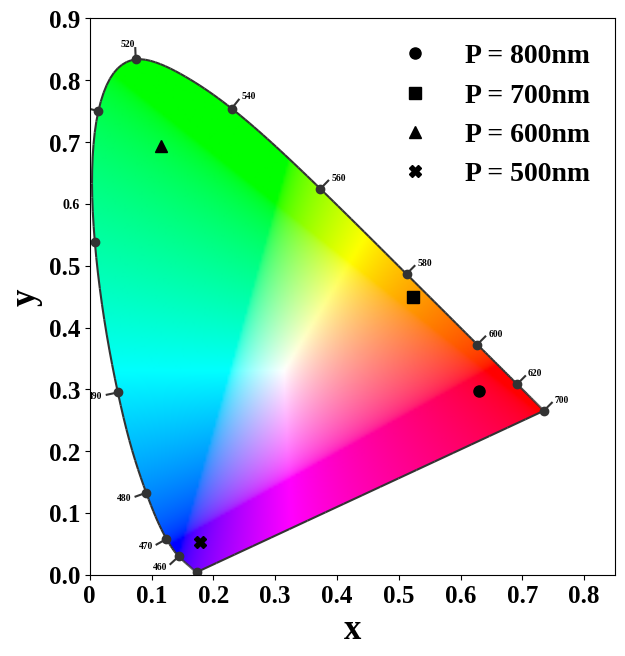

In [20]:
figure, axes = colour.plotting.diagrams.plot_chromaticity_diagram_CIE1931(standalone=False)
axes.plot(xc50_800, yc50_800, 'ko', label='P = 800nm',ms=8)
axes.plot(xc50_700, yc50_700, 'ks', label='P = 700nm',ms=8)
axes.plot(xc50_600, yc50_600, 'k^', label='P = 600nm',ms=8)
axes.plot(xc50_500, yc50_500, 'kX', label='P = 500nm',ms=8)
plt.xlabel('x',fontsize=25, fontweight='bold')
plt.ylabel('y', fontsize=25,fontweight='bold')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0,0.85)
plt.ylim(0,0.9)
plt.xticks(ticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], labels=['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8'], fontsize=18)
plt.title(r'')
plt.legend(loc='upper right', fontsize=20, frameon=False)
#plt.savefig('/content/sample_data/50deg.png', dpi=600)

## 60deg

In [24]:
wvl2=np.arange(400,751,1) #new interpolation range

In [28]:
print(wvl2)

[400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417
 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435
 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450 451 452 453
 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468 469 470 471
 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489
 490 491 492 493 494 495 496 497 498 499 500 501 502 503 504 505 506 507
 508 509 510 511 512 513 514 515 516 517 518 519 520 521 522 523 524 525
 526 527 528 529 530 531 532 533 534 535 536 537 538 539 540 541 542 543
 544 545 546 547 548 549 550 551 552 553 554 555 556 557 558 559 560 561
 562 563 564 565 566 567 568 569 570 571 572 573 574 575 576 577 578 579
 580 581 582 583 584 585 586 587 588 589 590 591 592 593 594 595 596 597
 598 599 600 601 602 603 604 605 606 607 608 609 610 611 612 613 614 615
 616 617 618 619 620 621 622 623 624 625 626 627 628 629 630 631 632 633
 634 635 636 637 638 639 640 641 642 643 644 645 64

In [72]:
f60_800=interpolate.interp1d(ref_60.Wavelength, ref_60.ptrn_800nm)
# obtain y value from interpolated function
y60_800=f60_800(wvl)
# for 700nm periodicity
f60_700=interpolate.interp1d(ref_60.Wavelength, ref_60.ptrn_700nm)
y60_700=f60_700(wvl)
# for 600nm periodicity
f60_600=interpolate.interp1d(ref_60.Wavelength, ref_60.ptrn_600nm)
y60_600=f60_600(wvl)
# for 500nm periodicity
f60_500=interpolate.interp1d(ref_60.Wavelength, ref_60.ptrn_500nm)
y60_500=f60_500(wvl)

In [74]:
#now do it for theta=50deg
xc60_800,yc60_800=xycal(y60_800,wvl)
xc60_700,yc60_700=xycal(y60_700,wvl)
xc60_600,yc60_600=xycal(y60_600,wvl)
xc60_500,yc60_500=xycal(y60_500,wvl)

/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028
/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028


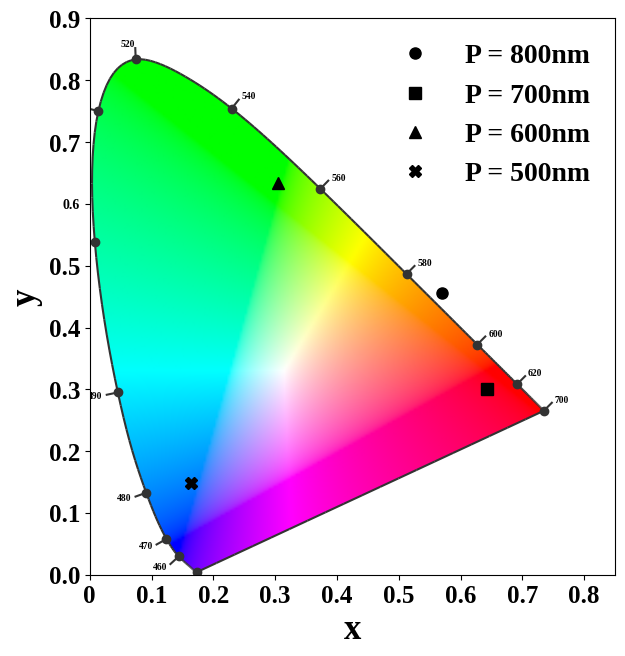

In [75]:
figure, axes = colour.plotting.diagrams.plot_chromaticity_diagram_CIE1931(standalone=False)
axes.plot(xc60_800, yc60_800, 'ko', label='P = 800nm',ms=8)
axes.plot(xc60_700, yc60_700, 'ks', label='P = 700nm',ms=8)
axes.plot(xc60_600, yc60_600, 'k^', label='P = 600nm',ms=8)
axes.plot(xc60_500, yc60_500, 'kX', label='P = 500nm',ms=8)
plt.xlabel('x',fontsize=25,fontweight='bold')
plt.ylabel('y',fontsize=25,fontweight='bold')
plt.xticks(fontsize=18,fontweight='bold')
plt.yticks(fontsize=18,fontweight='bold')
plt.title(r'')
plt.xticks(ticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], labels=['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8'], fontsize=18)
plt.xlim(0,0.85)
plt.ylim(0,0.9)
plt.legend(loc='upper right', fontsize=20, frameon=False)
#plt.savefig('/content/sample_data/60deg.png', dpi=600)

I done the interpolation from **400-750** But I don't see any shift in the point position.

# Periodicity Variation

## 800nm Periodicity

/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028
/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028


(0.0, 0.9)

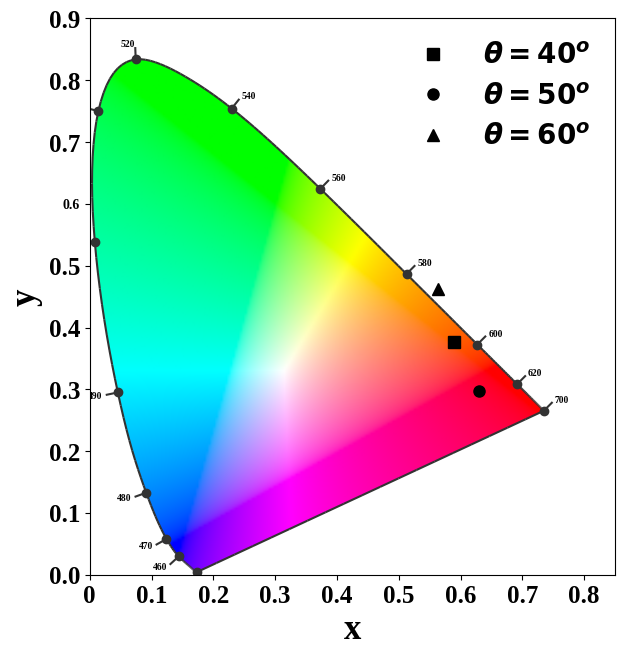

In [30]:
figure, axes = colour.plotting.diagrams.plot_chromaticity_diagram_CIE1931(standalone=False)
axes.plot(xc40_800, yc40_800, 'ks', label=r'$\theta=40^o$',ms=8)
axes.plot(xc50_800, yc50_800, 'ko', label=r'$\theta=50^o$',ms=8)
axes.plot(xc60_800, yc60_800, 'k^', label=r'$\theta=60^o$',ms=8)
plt.xlabel('x',fontsize=25,fontweight='bold')
plt.ylabel('y',fontsize=25,fontweight='bold')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title(r'')
plt.xticks(ticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], labels=['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8'], fontsize=18)
plt.legend(loc='upper right',fontsize=20, frameon=False)
plt.xlim(0,0.85)
plt.ylim(0,0.9)
#plt.savefig('/content/sample_data/800nm.png')

## 700nm Periodicity

/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028
/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028


(0.0, 0.9)

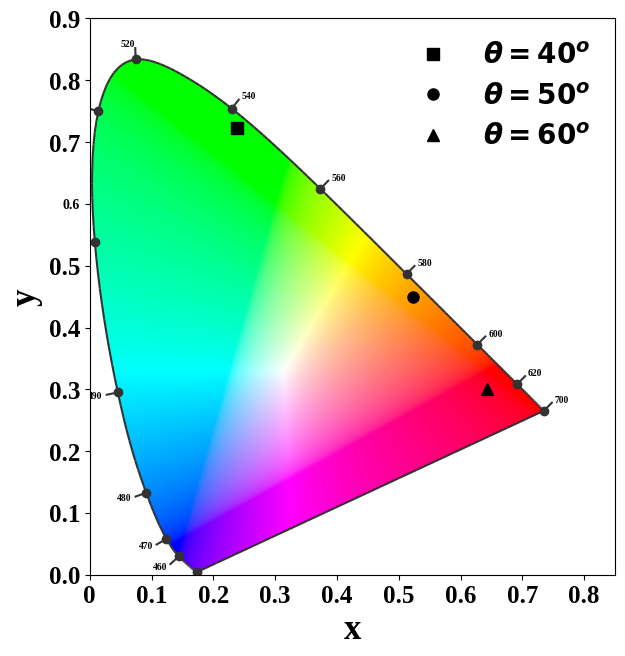

In [32]:
figure, axes = colour.plotting.diagrams.plot_chromaticity_diagram_CIE1931(standalone=False)
axes.plot(xc40_700, yc40_700, 'ks', label=r'$\theta=40^o$',ms=8)
axes.plot(xc50_700, yc50_700, 'ko', label=r'$\theta=50^o$',ms=8)
axes.plot(xc60_700, yc60_700, 'k^', label=r'$\theta=60^o$',ms=8)
plt.xlabel('x',fontsize=25,fontweight='bold')
plt.ylabel('y',fontsize=25,fontweight='bold')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title(r'')
plt.xticks(ticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], labels=['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8'], fontsize=18)
plt.legend(loc='upper right',fontsize=20, frameon=False)
plt.xlim(0,0.85)
plt.ylim(0,0.9)
#plt.savefig('/content/sample_data/700nm.png')

## 600nm Periodicity

/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028
/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028


(0.0, 0.9)

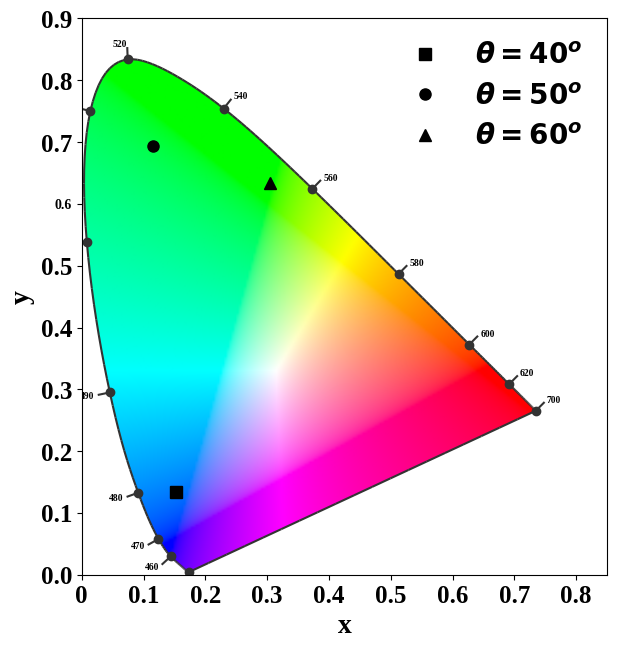

In [33]:
figure, axes = colour.plotting.diagrams.plot_chromaticity_diagram_CIE1931(standalone=False)
axes.plot(xc40_600, yc40_600, 'ks', label=r'$\theta=40^o$',ms=8)
axes.plot(xc50_600, yc50_600, 'ko', label=r'$\theta=50^o$',ms=8)
axes.plot(xc60_600, yc60_600, 'k^', label=r'$\theta=60^o$',ms=8)
plt.xlabel('x',fontsize=20,fontweight='bold')
plt.ylabel('y',fontsize=20,fontweight='bold')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title(r'')
plt.xticks(ticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], labels=['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8'], fontsize=18)
plt.legend(loc='upper right',fontsize=20, frameon=False)
plt.xlim(0,0.85)
plt.ylim(0,0.9)
#plt.savefig('/content/sample_data/800nm.png')

## 500nm Periodicity

/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028
/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028


(0.0, 0.9)

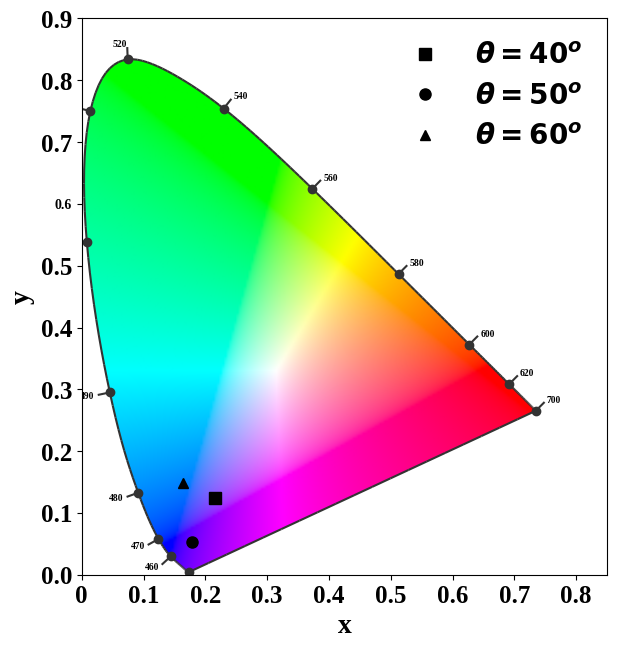

In [34]:
figure, axes = colour.plotting.diagrams.plot_chromaticity_diagram_CIE1931(standalone=False)
axes.plot(xc40_500, yc40_500, 'ks', label=r'$\theta=40^o$',ms=8)
axes.plot(xc50_500, yc50_500, 'ko', label=r'$\theta=50^o$',ms=8)
axes.plot(xc60_500, yc60_500, 'k^', label=r'$\theta=60^o$',ms=7)
plt.xlabel('x',fontsize=20,fontweight='bold')
plt.ylabel('y',fontsize=20,fontweight='bold')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title(r'')
plt.xticks(ticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], labels=['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8'], fontsize=18)
plt.legend(loc='upper right',fontsize=20, frameon=False)
plt.xlim(0,0.85)
plt.ylim(0,0.9)
#plt.savefig('/content/sample_data/800nm.png')

# P = 800 and $\theta=60^o$

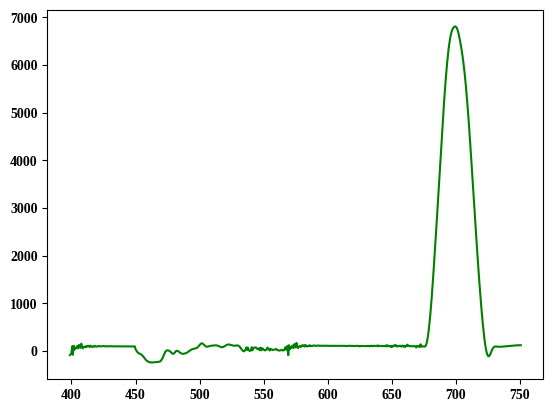

In [41]:
plt.plot(ref_60.Wavelength,ref_60.ptrn_800nm, 'g-', label='Experimental data')

In [59]:
def xyval(y):
  xch=np.trapz(y*cie.x[40:341],wvl)
  ych=np.trapz(y*cie.y[40:341],wvl)
  zch=np.trapz(y*cie.z[40:341],wvl)
  x=xch/(xch+ych+zch)
  y=ych/(xch+ych+zch)
  return x,y

In [60]:
wvl

array([400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412,
       413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425,
       426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438,
       439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451,
       452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464,
       465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477,
       478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490,
       491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503,
       504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516,
       517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529,
       530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542,
       543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555,
       556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568,
       569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 58

Integration in the range $\lambda=400-700nm$

In [61]:
f60_800=interpolate.interp1d(ref_60.Wavelength, ref_60.ptrn_800nm)
# obtain y value from interpolated function
yn60_800=f60_800(wvl)

In [63]:
xnc60_800,ync60_800=xyval(yn60_800)
print(xnc60_800,ync60_800)

0.555087254319 0.470561237874


Integration in the range $\lambda = 400-750nm$

In [69]:
wvl2=np.arange(400,751,1) #new interpolation range

In [70]:
def xyval2(y):
  xch=np.trapz(y*cie.x[40:391],wvl2)
  ych=np.trapz(y*cie.y[40:391],wvl2)
  zch=np.trapz(y*cie.z[40:391],wvl2)
  x=xch/(xch+ych+zch)
  y=ych/(xch+ych+zch)
  return x,y

In [71]:
f60_800=interpolate.interp1d(ref_60.Wavelength, ref_60.ptrn_800nm)
# obtain y value from interpolated function
yn260_800=f60_800(wvl2)
# calculate x and y values
xn2c60_800,yn2c60_800=xyval2(yn260_800)
print(xn2c60_800,yn2c60_800)

0.563336327754 0.461134140727


Integration using tools from **colour** library

In [76]:
# x,y values for wavelength in range 400-700nm
xcl60_800,ycl60_800=xycal(yn60_800,wvl)
print(xcl60_800,ycl60_800)

0.569512231241 0.455230871497


In [77]:
# x,y values for wavelength in range 400-750nm
xcl260_800,ycl260_800=xycal(yn260_800,wvl2)
print(xcl260_800,ycl260_800)

0.56385876793 0.461731205604


/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028
/content/colour/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028


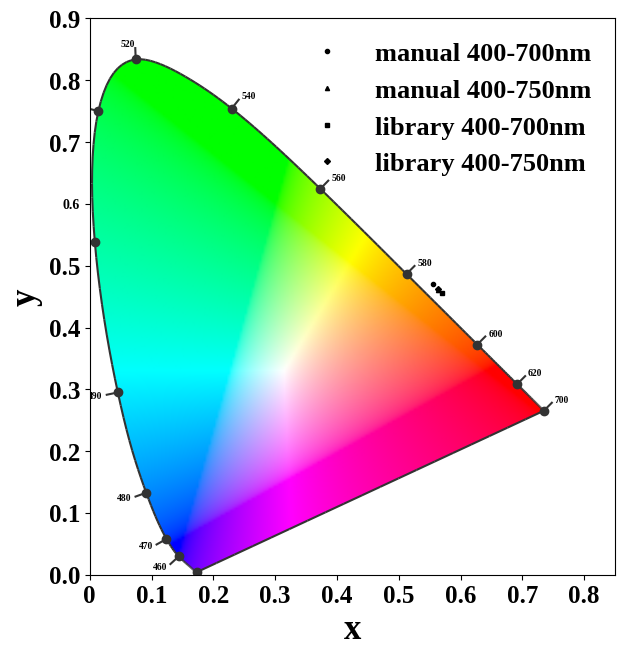

In [82]:
figure, axes = colour.plotting.diagrams.plot_chromaticity_diagram_CIE1931(standalone=False)
axes.plot(xnc60_800,ync60_800, 'ko', label='manual 400-700nm',ms=3)
axes.plot(xn2c60_800,yn2c60_800, 'k^', label='manual 400-750nm',ms=3)
axes.plot(xcl60_800,ycl60_800, 'ks', label='library 400-700nm',ms=3)
axes.plot(xcl260_800,ycl260_800, 'kD', label='library 400-750nm',ms=3)
plt.xlabel('x', fontsize=25, fontweight='bold')
plt.ylabel('y', fontsize=25,fontweight='bold')
plt.xticks(ticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], labels=['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8'], fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0,0.85)
plt.ylim(0,0.9)
plt.title(r'')
plt.legend(loc='upper right',fontsize=19, frameon=False)
#plt.savefig('/content/sample_data/40deg.png', dpi=600)